In [1]:
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import pickle
import itertools
import matplotlib as mpl
from keras.preprocessing.image import load_img, img_to_array


sns.set()

mpl.rcParams.update({
    'font.size'           : 18.0,
    'axes.titlesize'      : 'large',
    'axes.labelsize'      : 'medium',
    'xtick.labelsize'     : 'medium',
    'ytick.labelsize'     : 'medium',
    'legend.fontsize'     : 'medium',
})

Using TensorFlow backend.


In [5]:
my_model = pd.read_csv('../logs/simple_cnn_log.csv')
my_model.shape

(20, 5)

In [6]:
xc =  pd.read_csv('../logs/xc_run_log.csv')
nw =  pd.read_csv('../logs/no_weight_log.csv')

xc.head()

,Step,val_acc,val_loss,train_loss,train_acc
0,0,0.764193,0.760691,1.090881,0.687052
1,0,0.755681,0.771485,1.093277,0.689347
2,1,0.787337,0.694400,0.592444,0.809228
3,2,0.797538,0.702921,0.470642,0.844506
4,3,0.808371,0.688724,0.374643,0.872878


In [7]:
xc.columns = ['steps','Validation Accuracy', 'Validation Loss', 'Training Loss', 'Training Accuracy']
nw.columns = ['steps','Validation Accuracy', 'Validation Loss', 'Training Loss', 'Training Accuracy']
my_model.columns = ['steps','Training Accuracy', 'Training Loss', 'Validation Accuracy', 'Validation Loss']

In [10]:
%%capture

fig_acc, axes_acc = plt.subplots(1,2 ,figsize = (16,8), sharey=True)
fig_loss, axes_loss = plt.subplots(1,2 ,figsize = (16,8), sharey=True)
fig_nw, axes_nw = plt.subplots(1,1 ,figsize = (8,8))


In [11]:
xc[['Training Accuracy','Validation Accuracy']].plot.line(ax =  axes_acc[0])
my_model[['Training Accuracy','Validation Accuracy']].plot.line(ax =  axes_acc[1], sharex =  axes_acc[0])
xc[['Training Loss','Validation Loss']].plot.line(ax =  axes_loss[0])
my_model[['Training Loss','Validation Loss']].plot.line(ax =  axes_loss[1])
nw[['Training Accuracy','Validation Accuracy']].plot.line(ax =  axes_nw)

In [12]:
axes_acc[0].set_title('Xception Pre-Trained')
axes_acc[0].set_ylabel('Accuracy')
axes_acc[0].set_xlabel('Epochs')
axes_acc[1].set_xlabel('Epochs')
axes_acc[1].set_title('Standard CNN from Scratch')
axes_nw.set_title('Xception from Scratch')
axes_nw.set_ylabel('Accuracy')
axes_nw.set_xlabel('Epochs')

Text(0.5,3.2,'Epochs')

In [13]:
axes_loss[0].set_title('Xception Pre-Trained')
axes_loss[0].set_ylabel('Loss')
axes_loss[0].set_xlabel('Epochs')
axes_loss[1].set_xlabel('Epochs')
axes_loss[1
         ].set_title('Standard CNN from Scratch')

Text(0.5,1,'Standard CNN from Scratch')

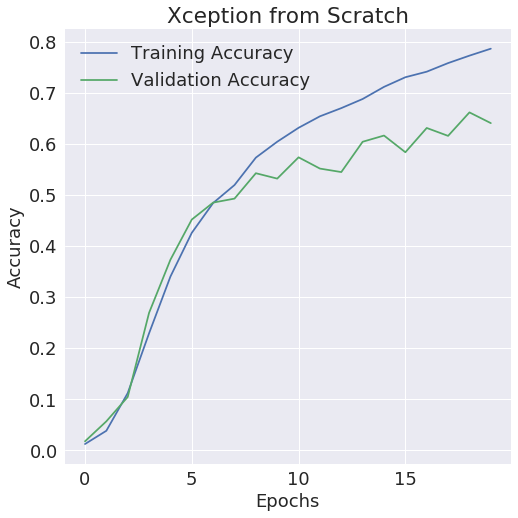

In [13]:
fig_nw

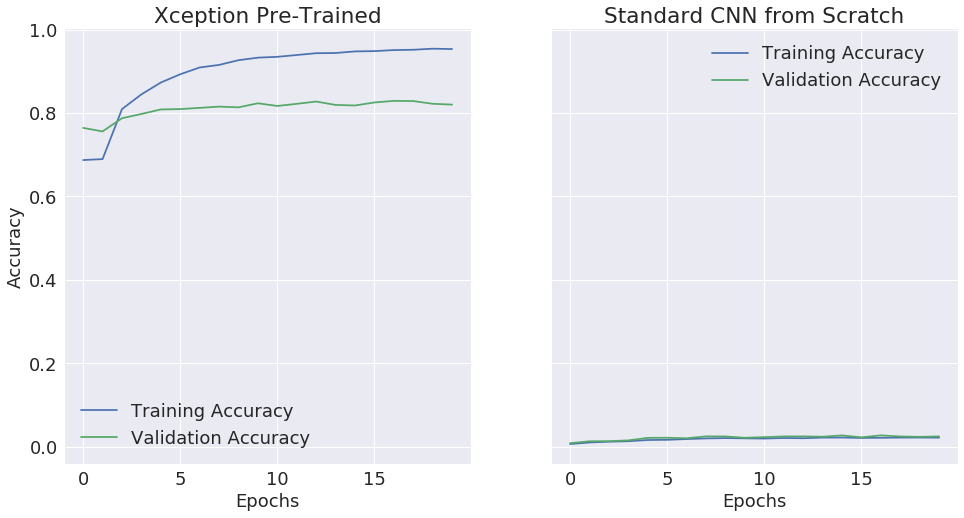

In [14]:
fig_acc

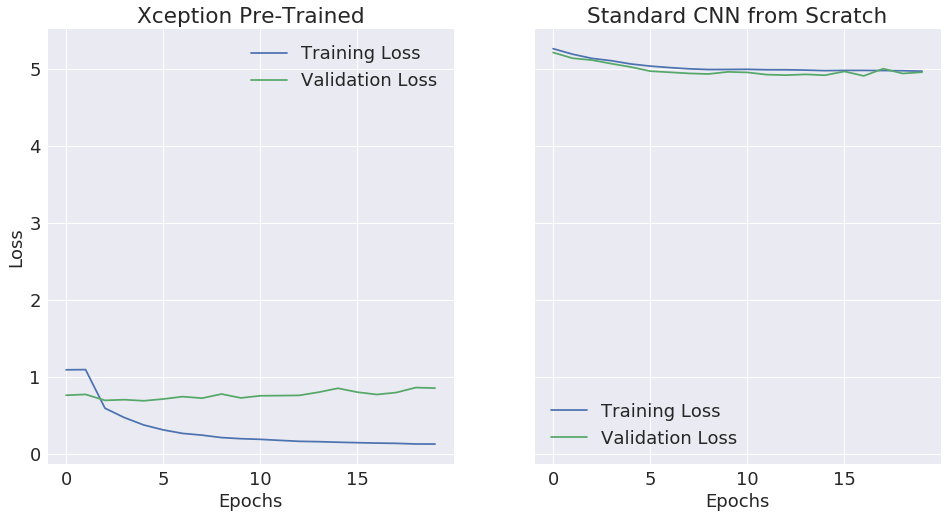

In [15]:
fig_loss

In [19]:
with open('../logs/simple_cnn_eval_cm.pkl', 'rb') as f:
    cm_my_model = pickle.load(f)
with open('../logs/xc_adam_eval_cm.pkl', 'rb') as f:
    cm_xc_model = pickle.load(f)
with open('../class_names.pkl', 'rb') as f:
    class_names = pickle.load(f)

In [20]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.jet):
    """
    This function prints and plots the confusion matrix.
    """
    
    fig, ax = plt.subplots(1,1,figsize = (8,8))
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    print(len(classes))
    ax.set_title(title)
    plt.colorbar(ax=ax)

    plt.tight_layout()
    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')

188


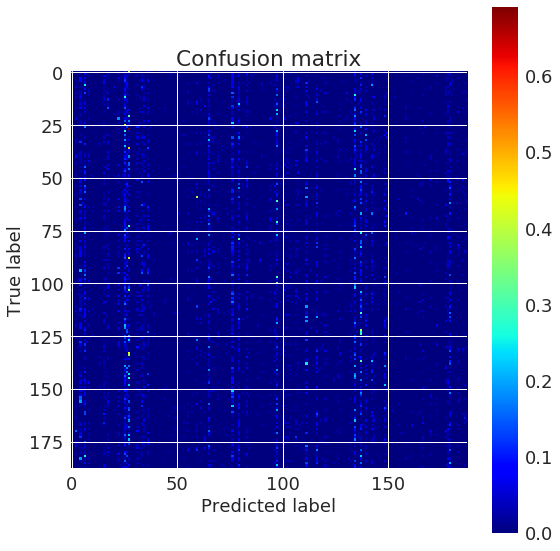

In [21]:

sze = 188
plot_confusion_matrix(cm_my_model[:sze,:sze], class_names[:sze])


188


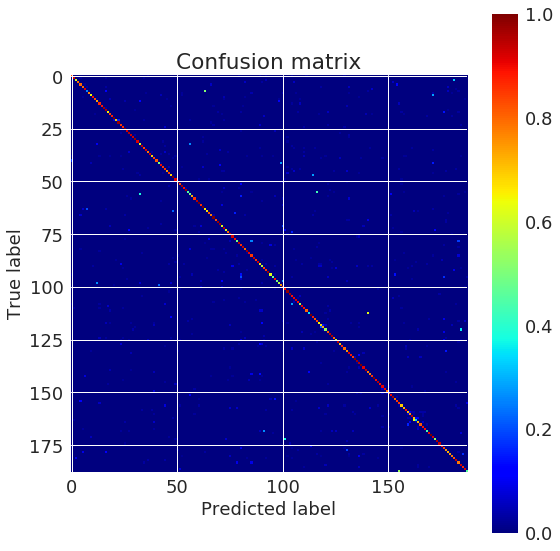

In [22]:
plot_confusion_matrix(cm_xc_model[:sze,:sze], class_names[:sze])

In [25]:
from heapq import nlargest
from collections import defaultdict

d = defaultdict(list)

for i in range(len(cm2)):
    for j in range(i):
      d[cm2[i][j]].append((i, j))

for value, positions in nlargest(5, d.items(), key=lambda item: item[0]):
    print (class_names[positions[0][0]] + " for " + class_names[positions[0][1]], f'{value*100:1f}%')

Spaniel (English Cocker) for Spaniel (Cocker) 64.285714%
Yorkshire Terrier for Silky Terrier 53.846154%
Collie for Border Collie 38.461538%
Standard Schnauzer for Miniature Schnauzer 37.500000%
Norwich Terrier for Norfolk Terrier 28.571429%
